In [2]:
#importing relevant 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [3]:
#Uploading data file
df= pd.read_csv(r'C:\Users\MSI\AppData\Local\Packages\microsoft.windowscommunicationsapps_8wekyb3d8bbwe\LocalState\Files\S0\4\Attachments\testData.csv')

In [4]:
df.shape    #Returns number of (rows, columns) in the data

(102, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   disclosureYear          102 non-null    int64 
 1   disclosureDate          102 non-null    object
 2   transactionDate         102 non-null    object
 3   owner                   102 non-null    object
 4   ticker                  102 non-null    object
 5   assetDescription        102 non-null    object
 6   type                    102 non-null    object
 7   amount                  102 non-null    object
 8   representative          102 non-null    object
 9   district                102 non-null    object
 10  capitalGainsOver200USD  102 non-null    object
 11  option_symbol           2 non-null      object
dtypes: int64(1), object(11)
memory usage: 9.7+ KB


In [6]:
# Column 'option_symbol' has only 2 non-null values, making it irrelevant for further analysis
# Removing column 'option_symbol' 
df.drop(df.columns[11:], axis=1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   disclosureYear          102 non-null    int64 
 1   disclosureDate          102 non-null    object
 2   transactionDate         102 non-null    object
 3   owner                   102 non-null    object
 4   ticker                  102 non-null    object
 5   assetDescription        102 non-null    object
 6   type                    102 non-null    object
 7   amount                  102 non-null    object
 8   representative          102 non-null    object
 9   district                102 non-null    object
 10  capitalGainsOver200USD  102 non-null    object
dtypes: int64(1), object(10)
memory usage: 8.9+ KB


In [7]:
#Changing data types as required
df['transactionDate']=pd.to_datetime(df['transactionDate'])
df['ticker']= df['ticker'].astype('string').rename({'ticker': 'symbol'})
df['type']=df['type'].astype('string').rename({'type': 'side'})
df['size']= 1
df['size']= df['size'].astype(float)
df.rename(columns={'transactionDate': 'Date', 'ticker': 'symbol', 'type': 'side'}, inplace= True)

In [8]:
df.head(6)

,disclosureYear,disclosureDate,Date,owner,symbol,assetDescription,side,amount,representative,district,capitalGainsOver200USD,size
0,2023,6/15/2023,2023-05-20,Spouse,AAPL,Apple Inc. Stock,Purchase,"$100,001 - $250,000",Nancy Pelosi,CA-12,Yes,1.0
1,2023,5/12/2023,2023-04-10,Self,GOOGL,Alphabet Inc. Stock,Sale (Full),"$50,001 - $100,000",Nancy Pelosi,CA-12,No,1.0
2,2023,12/29/2023,2022-12-06,Dependent,AMZN,AMZN Stock,Purchase,"$100,001 - $250,000",Nancy Pelosi,NY-14,Yes,1.0
3,2023,2/13/2022,2022-04-14,Self,AMZN,AMZN Stock,Purchase,"$100,001 - $250,000",Nancy Pelosi,FL-9,No,1.0
4,2023,6/23/2023,2022-03-11,Joint,MSFT,MSFT Stock,Purchase,"$1,001 - $15,000",Nancy Pelosi,CA-12,Yes,1.0
5,2023,9/22/2022,2023-03-05,Self,GOOGL,GOOGL Stock,Sale (Full),"$50,001 - $100,000",Nancy Pelosi,CA-12,No,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   disclosureYear          102 non-null    int64         
 1   disclosureDate          102 non-null    object        
 2   Date                    102 non-null    datetime64[ns]
 3   owner                   102 non-null    object        
 4   symbol                  102 non-null    string        
 5   assetDescription        102 non-null    object        
 6   side                    102 non-null    string        
 7   amount                  102 non-null    object        
 8   representative          102 non-null    object        
 9   district                102 non-null    object        
 10  capitalGainsOver200USD  102 non-null    object        
 11  size                    102 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object

In [10]:
#Since 'amount' is given as interval, calculating average amount enables to use it for analysis
def calculate_midpoint(interval):
    low, high = [i.strip('$ ').replace(',', '') for i in interval.split('-')]
    # Convert to float and calculate the midpoint
    low = float(low)
    high = float(high)
    return (low + high) / 2

df['Avg_Amount'] = df['amount'].apply(calculate_midpoint)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   disclosureYear          102 non-null    int64         
 1   disclosureDate          102 non-null    object        
 2   Date                    102 non-null    datetime64[ns]
 3   owner                   102 non-null    object        
 4   symbol                  102 non-null    string        
 5   assetDescription        102 non-null    object        
 6   side                    102 non-null    string        
 7   amount                  102 non-null    object        
 8   representative          102 non-null    object        
 9   district                102 non-null    object        
 10  capitalGainsOver200USD  102 non-null    object        
 11  size                    102 non-null    float64       
 12  Avg_Amount              102 non-null    float64   

In [11]:
#Ticker Price
def getTickerPrice(ticker: str, date: pd.Timestamp):
    return random.uniform(1, 100)
getTickerPrice('GOOGL', 9/22/2022)

8.899431802720503

In [12]:
#creating a new column 'price' from getTickerPrice() function
df['price']= getTickerPrice(df['symbol'], ['date'])

In [13]:
df.info()  
#The data has no null values
#A new column 'price' has been created
#Data types have been changed for columns as required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   disclosureYear          102 non-null    int64         
 1   disclosureDate          102 non-null    object        
 2   Date                    102 non-null    datetime64[ns]
 3   owner                   102 non-null    object        
 4   symbol                  102 non-null    string        
 5   assetDescription        102 non-null    object        
 6   side                    102 non-null    string        
 7   amount                  102 non-null    object        
 8   representative          102 non-null    object        
 9   district                102 non-null    object        
 10  capitalGainsOver200USD  102 non-null    object        
 11  size                    102 non-null    float64       
 12  Avg_Amount              102 non-null    float64   

In [14]:
df['price'].describe()

count    1.020000e+02
mean     3.845671e+01
std      7.140516e-15
min      3.845671e+01
25%      3.845671e+01
50%      3.845671e+01
75%      3.845671e+01
max      3.845671e+01
Name: price, dtype: float64

In [15]:
#Total Trades
total_trades= len(df)
print(total_trades)

102


In [16]:
#Replacing values in column 'Side' to 'Sell' abd 'Buy'
df['side'] = df['side'].replace({"Purchase": "Buy", "Sale (Full)": "Sell", "Sale (Partial)": "Sell"})
unique_sides = df['side'].unique()
print(unique_sides)

<StringArray>
['Buy', 'Sell']
Length: 2, dtype: string


In [17]:
#Number of Long and Short trades
long_trades= len(df[df['side']=='Buy'])
print(long_trades)
short_trades= len(df[df['side']=='Sell'])
print(short_trades)

40
62


In [18]:
#Long-Short strategy (by owners)
long_short_strategy = df.groupby('owner')['symbol'].apply(lambda x: 'Long-Short' if len(set(x)) > 1 else 'Long Only')
print(long_short_strategy)

owner
Dependent    Long-Short
Joint        Long-Short
Self         Long-Short
Spouse       Long-Short
Name: symbol, dtype: object


In [19]:
def identify_long_short(df):
    symbols = df['symbol'].unique()
    long_positions = df[df['side'] == 'Buy']['symbol'].unique()
    short_positions = df[df['side'] == 'Sell']['symbol'].unique()
        
    if set(long_positions) & set(short_positions):
        return 'Long-Short'
    elif len(long_positions) > 0:
        return 'Long Only'
    else:
        return 'Short Only'

In [20]:
identify_long_short(df)

'Long-Short'

In [21]:
#Buy vs Sell percentage
trade_type_distribution = df['side'].value_counts(normalize=True)
print(trade_type_distribution)

side
Sell    0.607843
Buy     0.392157
Name: proportion, dtype: Float64


In [22]:
#Trades per owner
trades_per_owner = df['owner'].value_counts()
print(trades_per_owner)

owner
Dependent    27
Self         26
Joint        25
Spouse       24
Name: count, dtype: int64


In [23]:
#Capital gains over 200USD
capital_gains_count = df['capitalGainsOver200USD'].value_counts()
print(capital_gains_count)

percentage_capital_gains = capital_gains_count.get('Yes', 0) / total_trades
print(percentage_capital_gains)

capital_gains_by_owner = df.groupby('owner')['capitalGainsOver200USD'].value_counts().unstack(fill_value=0)
print(capital_gains_by_owner)

capitalGainsOver200USD
Yes    56
No     46
Name: count, dtype: int64
0.5490196078431373
capitalGainsOver200USD  No  Yes
owner                          
Dependent                7   20
Joint                   13   12
Self                    15   11
Spouse                  11   13


In [24]:
percentage_capital_gains = capital_gains_count.get('Yes', 0) / total_trades
print(percentage_capital_gains)

0.5490196078431373


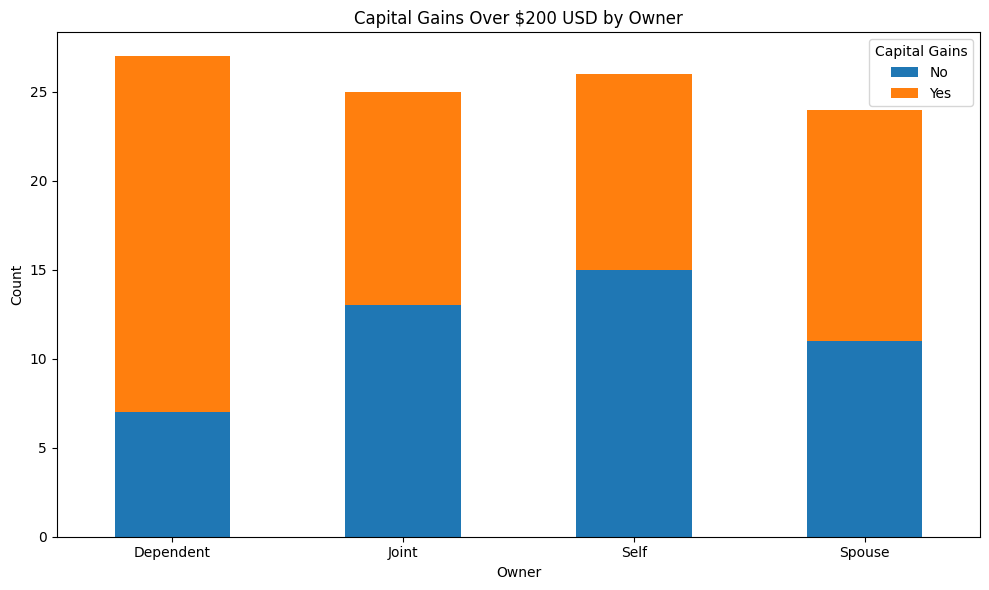

In [25]:
# Plotting a stacked bar plot for capital gains by owner
capital_gains_by_owner = df.groupby('owner')['capitalGainsOver200USD'].value_counts().unstack(fill_value=0)
capital_gains_by_owner.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Capital Gains Over $200 USD by Owner')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Capital Gains')
plt.tight_layout()

# Show plot
plt.show()

capitalGainsOver200USD  No  Yes
symbol                         
AAPL                     7   17
AMZN                     3   12
GOOGL                   12    6
MSFT                    16   15
TSLA                     8    6


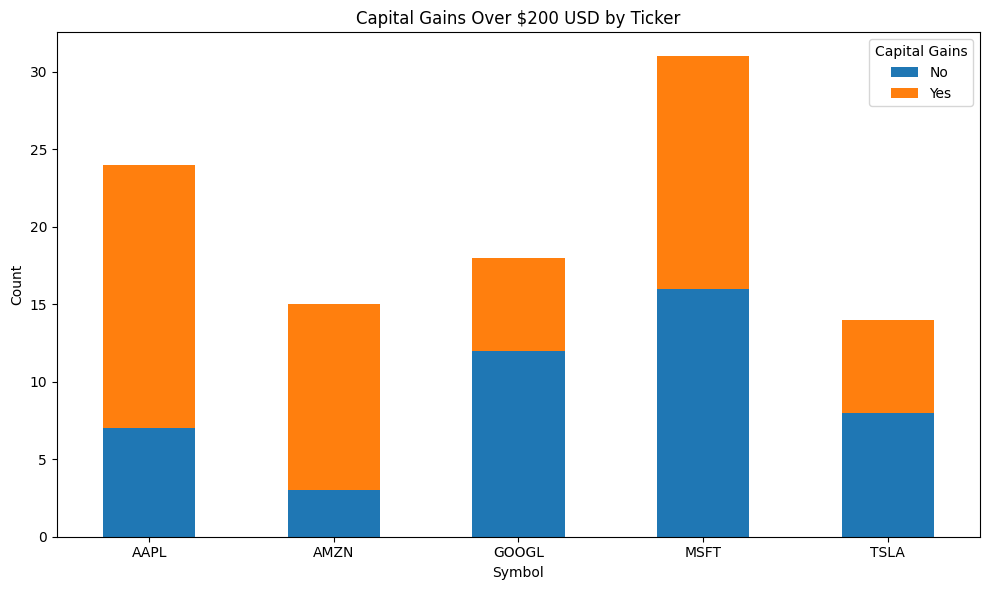

In [29]:
# Plotting a stacked bar plot for capital gains by ticker
capital_gains_by_ticker = df.groupby('symbol')['capitalGainsOver200USD'].value_counts().unstack(fill_value=0)
print(capital_gains_by_ticker)
capital_gains_by_ticker.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Capital Gains Over $200 USD by Ticker')
plt.xlabel('Symbol')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Capital Gains')
plt.tight_layout()

# Show plot
plt.show()

39.53921568627451
Date
2022-01    1
2022-02    2
2022-03    8
2022-04    3
2022-05    6
2022-06    5
2022-07    4
2022-08    5
2022-09    5
2022-10    8
2022-11    3
2022-12    3
2023-01    8
2023-02    2
2023-03    6
2023-04    4
2023-05    4
2023-06    3
2023-07    5
2023-08    3
2023-09    2
2023-10    3
2023-11    3
2023-12    6
Freq: M, Name: count, dtype: int64


Text(0.5, 1.0, 'Trades Over Time')

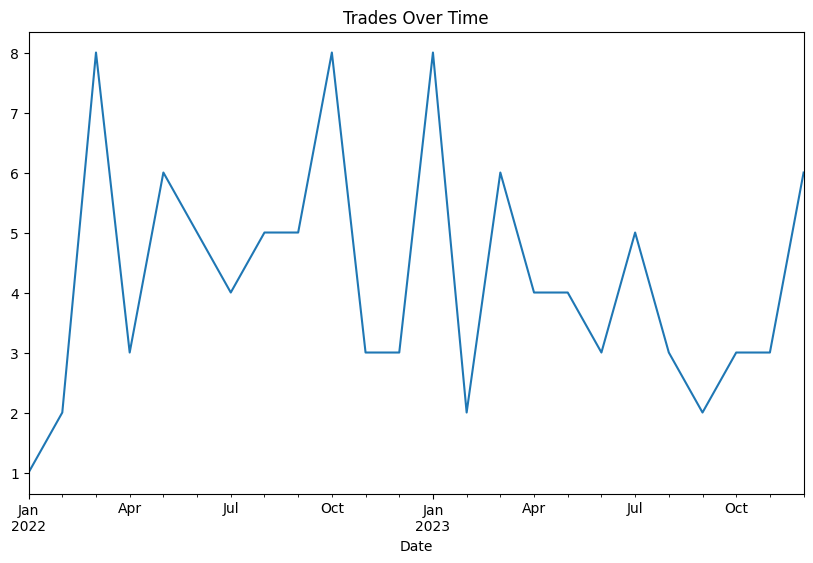

In [304]:
#Holding period and Trades over time

df['disclosureDate']=pd.to_datetime(df['disclosureDate'])
df['holding_period'] = (df['disclosureDate'] - df['Date']).dt.days
average_holding_period = df['holding_period'].mean()
print(average_holding_period)
trades_over_time = df['Date'].dt.to_period('M').value_counts().sort_index()
print(trades_over_time)

#Plotting Trades over Time
trades_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Trades Over Time')

In [305]:
#Trade strategies by owners
long_short_strategy = df.groupby('owner').apply(identify_long_short, include_groups= False)
print(long_short_strategy)

owner
Dependent    Long-Short
Joint        Long-Short
Self         Long-Short
Spouse       Long-Short
dtype: object


In [340]:
#Function to compute financial metrics
def compute_metrics(df):
    metrics = {}
    
    # Check if DataFrame is empty
    if df.empty:
        print("The DataFrame is empty. No metrics to compute.")
        return {}
    
    # Filter long and short positions
    long_strategy = df[df['side'] == 'Buy']
    short_strategy = df[df['side'].isin(['Sell'])]
    
    # Handle missing values
    df = df.fillna(method='ffill').fillna(method='bfill')
    
    if not long_strategy.empty:
        metrics['Long Total Return'] = long_strategy['Avg_Amount'].sum()
        metrics['Long Win Rate'] = len(long_strategy[long_strategy['Avg_Amount'] > 0]) / len(long_strategy)
        metrics['Long Average Profit per Trade'] = long_strategy['Avg_Amount'].mean()
    
    if not short_strategy.empty:
        metrics['Short Total Return'] = short_strategy['Avg_Amount'].sum()
        metrics['Short Win Rate'] = len(short_strategy[short_strategy['Avg_Amount'] > 0]) / len(short_strategy)
        metrics['Short Average Profit per Trade'] = short_strategy['Avg_Amount'].mean()
    
    # Placeholder calculations for additional metrics
    long_short_strategy = df.groupby('side')['Avg_Amount'].sum()
    # trades_over_time = df.groupby('Date').size()
    trades_over_time = df.groupby(pd.Grouper(key='Date', freq='M')).size()
    percentage_capital_gains = (df[df['capitalGainsOver200USD'] == 'Yes'].shape[0] / df.shape[0]) * 100
    capital_gains_by_owner_abs = df[df['capitalGainsOver200USD'] == 'Yes'].groupby('owner')['Avg_Amount'].sum()
    total_gains_by_owner = df.groupby('owner')['Avg_Amount'].sum()
    capital_gains_by_owner_prcnt=  (capital_gains_by_owner_abs / total_gains_by_owner) * 100

    capital_gains_by_owner = {
        'absolute': capital_gains_by_owner_abs.to_dict(),
        'percentage': capital_gains_by_owner_prcnt.to_dict()
    }

    metrics.update({
        'Long-Short Strategy': long_short_strategy.to_dict(),
        'Trades Over Time': trades_over_time.to_dict(),
        'Percentage of Trades with Capital Gains': percentage_capital_gains,
        'Capital Gains by Owner': capital_gains_by_owner
    })
    
    return metrics


In [341]:
compute_metrics(df)

C:\Users\MSI\AppData\Local\Temp\ipykernel_11384\2991992708.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
C:\Users\MSI\AppData\Local\Temp\ipykernel_11384\2991992708.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trades_over_time = df.groupby(pd.Grouper(key='Date', freq='M')).size()


{'Long Total Return': np.float64(4398520.0),
 'Long Win Rate': 1.0,
 'Long Average Profit per Trade': np.float64(109963.0),
 'Short Total Return': np.float64(8677531.0),
 'Short Win Rate': 1.0,
 'Short Average Profit per Trade': np.float64(139960.17741935485),
 'Long-Short Strategy': {'Buy': 4398520.0, 'Sell': 8677531.0},
 'Trades Over Time': {Timestamp('2022-01-31 00:00:00'): 1,
  Timestamp('2022-02-28 00:00:00'): 2,
  Timestamp('2022-03-31 00:00:00'): 8,
  Timestamp('2022-04-30 00:00:00'): 3,
  Timestamp('2022-05-31 00:00:00'): 6,
  Timestamp('2022-06-30 00:00:00'): 5,
  Timestamp('2022-07-31 00:00:00'): 4,
  Timestamp('2022-08-31 00:00:00'): 5,
  Timestamp('2022-09-30 00:00:00'): 5,
  Timestamp('2022-10-31 00:00:00'): 8,
  Timestamp('2022-11-30 00:00:00'): 3,
  Timestamp('2022-12-31 00:00:00'): 3,
  Timestamp('2023-01-31 00:00:00'): 8,
  Timestamp('2023-02-28 00:00:00'): 2,
  Timestamp('2023-03-31 00:00:00'): 6,
  Timestamp('2023-04-30 00:00:00'): 4,
  Timestamp('2023-05-31 00:00:00

In [ ]:
'''
Interpretation

-Out of the total 102 trades, 40 were long stratey trades, while 62 were short trades, when grouped on the basis of 'Buy' as long strategy and 'Sell' 
as short strategy. Upon further ananlysis, it was found that all the owners had a long-short strategy and not purely long or short strategy. Nearly
60% of all trades involved selling of securities, leaving about 40% of trades involving purchase. Nearly 55% of all trades recorded capital gains 
over 200 USD. While trades per owner do not differ significantly in number, capital gains per owner differ signicantly, with 'dependent' owner recording
the highest proportion of capital gain.  
Accounting for capital gains by ticker, Apple Inc. Stock shows capital gains over 200 USD for around 70% of all tranasactions, Amazon 80% and Microsoft 
showing gains for about 48% trades. Only a third of all trade in Alphabet Inc. Stock and 42% of TSLA Stock show capital gains over 200 USD. 
Interestingly, number of transactions see a sharp increase around new year, followed by a sharp decline over the first quarter of the year and stabilizing
over the rest of the year. Total returns from long position are significantly higher than returns from short positions; which explains that the long-short
strategy by the owners is a smart move. 
Average profit per trade does not differ significantly in long and short positions. In percentage terms, capital gains by dependent are highest at 90% 
and the value is lowest for self at 37%. 
Overall, the analysis reveals that returns in short and long positions significantly differ (higher returns in short positions), the long-short strategy
by owners helps stabilize the volatility of returns. However, apart from trade strategy, capital gains significantly depend on the choice of assets 
traded, with Amazon Stock performing the best and Alphabet Inc. showing the least returns. 
'''